# Analise de NPS


        Atualmente, é de regra todas as empresas utilizarem o NPS (Net Promoter Score) como seu principal guia de entendimento de dores com o cliente, mas nem sempre é possível levantar 100% da sua base de clientes com o NPS, com isso deixando algumas pesquisas de NPS com viés amostral, justamente por não conseguirmos capturar nossa base totalmente, ou até mesmo começar a canibalizar a mesma, ou seja, enviar nossa pesquisa de NPS mais de uma vez para o mesmo cliente dentro de um  curto espaço de tempo.

## NPS

        Mas afinal, o que é o **NPS**?

        O Net Promoter Score nada mais é métrica de lealdade do cliente que tem como objetivo trazer reflexo da experiência e satisfação dos clientes o KPI é bastante simples e consiste em uma nota de 0 a 10 junto com um comentário que é informado pelo cliente em sua resposta[1].
        
        Nessa mensagem de contato com o cliente podemos utilizar alguns textos convidativos que façam com que o cliente se sinta mais à vontade para responder, podendo ter seu contato por E-Mail, SMS ou até mesmo aquela mensagem gravada após sua ligação em uma central de atendimento, um bom exemplo dessa mensagem é: 
_<center> “Em uma escala de 0 a 10, o quanto você recomendaria [a Empresa X ou o Produto X] para um [amigo, colega ou parente]? [2]”_ </center>

## Cálculo NPS

        Okay, okay, já falei muito, eu sei! Mas esse último tópico é muito importante para entendermos o que está por vir, okay? 
        Após recebermos a nota de 0 a 10 de nosso cliente, iremos classificar o mesmo em Promotor, Passivor ou Detrator com base na seguinte escala:
        
* Promotores (pessoas que responderam 9 e 10);

* Passivos (Pessoas que responderam 7 e 8) ;

* Detratores (Pessoas que responderam abaixo de 7 ).

        Ao classificar seus consumidores, é possível extrair o NPS através da seguinte fórmula:

<center> NPS = (% de promotores) – (% de detratores) </center>

        Agora com base nessas informações, vamos colocar a mão na massa e entender melhor o cenário hipotético que foi construído de maneira randômica via Excel (caso queira saber como foi gerada a base irei explicar melhor em um próximo artigo!).


## Mão na massa!
        Seguindo o código abaixo iremos importar a planilha no Excel com número fictícios da nossa Loja de Ferragens TOliveira S.A. com os dados de seus 100 mil clientes e as respostas dos clientes que responderam nosso NPS.

In [469]:
%matplotlib notebook
# importando biblioteca pandas para trabalharmos com os dataframes
import pandas as pd 
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt

# resgatamos os nomes das abas do arquivo que possuem dados do NPS que criamos neste artigo (xxxx)
df = pd.read_excel(r'C:\Users\tthia\Desktop\NPS\BASE_NPS_DADOS.xlsx')

df = df[df['Categoria'] != '0']

df.head()

,ID Cliente,Mês,Nota,Categoria
0,2,06/2020,8,Qualidade
1,4,06/2020,6,Preço
2,14,06/2020,9,Preço
3,15,06/2020,8,Preço
4,22,06/2020,10,Preço


        No arquivo excel como vimos anteriormente só temos os clientes e seus IDs por datas, vamos adicionar randomicamente suas notas e categorias.

### Entendendo nossas respostas
        Vamos começar olhando nossos números absolutos por Categoria e depois vamos abrir por status de NPS para entendermos melhor como está o nosso NPS!

In [470]:
#no arquivo readme.txt disponível no github temos as infos sobre nossas colunas por isso irei direto a nossas volumetrias!
#primeiro vamos analisar para ver nossas categorias 
df.groupby(["Categoria"])["ID Cliente"].count()

Categoria
Atendimento         426
Entrega           46910
Preço            202610
Qualidade         46833
Sem_Categoria       389
Name: ID Cliente, dtype: int64

In [471]:
#retiramos a média de notas de cada categoria
df.groupby(["Categoria"])["Nota"].mean()

Categoria
Atendimento      8.053991
Entrega          8.000981
Preço            8.001209
Qualidade        8.003609
Sem_Categoria    7.856041
Name: Nota, dtype: float64

### Primeiras considerações!
        Vimos que de longe "Preço" é a categoria mais citada por nossos clientes, porém possui uma média muito parecida com as de nossos outros temas, o que ainda não nos ajuda a concluir muita coisa, vamos olhar o histograma de distribuição de notas antes de passarmos para entender o NPS para entendermos como estão distribuidas essas notas.

### Por que o histograma de notas, se já utilizamos os clusters de NPS?
        Apesar de ter comentado as métricas de NPS acima com promotores acima de 9, só a visão do NPS é muito pouco para termos todas entendermos bem nosso clientes, pois podemos ter a maior quantidade de detratores com notas baixíssimas de 0 até 4, mas podemos ter nossa concentração em clientes que estão "batendo na trave", ou seja, com notas de 6 até 7, por isso sempre bom consultarmos nosso histograma de notas para entedermos onde estamos!

<IPython.core.display.Javascript object>


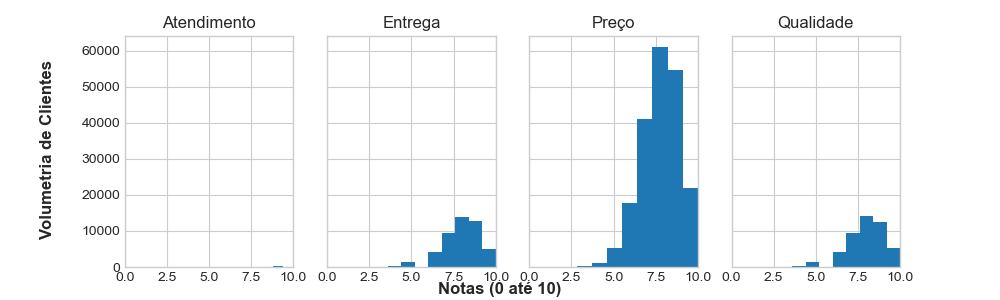

Text(0.5, 0.02, 'Notas (0 até 10)')

In [678]:
# vamos criar uma grade para 5 histogramas sobre os cinco temas acima, incluindos os que não tiveram categoria analisada
fig,  (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey = True,  figsize=(10, 3))
axs = [ax1,ax2,ax3,ax4]
bases = ["Atendimento","Entrega", "Preço","Qualidade", "Sem_Categoria"]
fig.subplots_adjust(hspace=0.5, wspace=0.2)

# desenha um histograma para cada categoria dentro da grade que criamos acima
for n in range(0,len(axs)):

    nome_graf = bases[n]
    df_hist = df.filter(items=["Nota"]).where(df['Categoria'] == '{}'.format(nome_graf)).dropna().values
    axs[n].hist(df_hist)
    axs[n].set_title('{}'.format(nome_graf))
    axs[n].set_xlim([0, 10])
    
fig.text(0.04, 0.5, 'Volumetria de Clientes', va='center', rotation='vertical', size = 12, fontweight='bold')
fig.text(0.5, 0.02, 'Notas (0 até 10)', ha='center', rotation='horizontal',  size = 12, fontweight='bold')

### Considerações sobre o histograma
        Olhando nossos números confirmamos como "Preço" realmente é um de nossos temas mais citados, é legal ver essa grande volumetria de clientes com notas de 7 até 8, mas sera que isso vai refletir no NPS da mesma forma mostrando clientes satisfeitos com preço?
        Vamos então agora clusterizar nosso NPS por nossas notas e começar a entender o quão satisfeito esta esse cliente!

In [494]:
nps_nome = [
    (df['Nota'] >= 9),
    (df['Nota'] >= 7) & (df['Nota'] < 9),
    (df['Nota'] < 7)]
nps_depara = ['Promotor','Passivo','Detrator']
df['Classificação'] = np.select(nps_nome, nps_depara)

df.head()

,ID Cliente,Mês,Nota,Categoria,Classificação
0,2,06/2020,8,Qualidade,Passivo
1,4,06/2020,6,Preço,Detrator
2,14,06/2020,9,Preço,Promotor
3,15,06/2020,8,Preço,Passivo
4,22,06/2020,10,Preço,Promotor


In [495]:
#utilizaremos o calculo de NPS em nossa base para termos nosso número final
count_nps = df.groupby(["Mês", "Categoria", "Classificação"])["ID Cliente"].count()
count_nps

Mês      Categoria      Classificação
01/2020  Atendimento    Detrator            8
                        Passivo            26
                        Promotor           38
         Entrega        Detrator          975
                        Passivo          3754
                                         ... 
08/2020  Qualidade      Passivo          1465
                        Promotor         1102
         Sem_Categoria  Detrator            3
                        Passivo             7
                        Promotor            7
Name: ID Cliente, Length: 120, dtype: int64

In [496]:
#vamos criar um df somente para contar quantos clientes tivemos para cada categoria
count_nps = df.groupby(["Mês", "Categoria", "Classificação"]).agg({'ID Cliente': 'count'}).reset_index()
count_nps.head()

,Mês,Categoria,Classificação,ID Cliente
0,01/2020,Atendimento,Detrator,8
1,01/2020,Atendimento,Passivo,26
2,01/2020,Atendimento,Promotor,38
3,01/2020,Entrega,Detrator,975
4,01/2020,Entrega,Passivo,3754


In [497]:
#também um df para a suma de cada categoria assim conseguiremos fazer nossa porcentagem
agg_nps = df.groupby(['Mês', 'Categoria']).agg({'ID Cliente': 'count'}).reset_index()

agg_nps.head()

,Mês,Categoria,ID Cliente
0,01/2020,Atendimento,72
1,01/2020,Entrega,7572
2,01/2020,Preço,32865
3,01/2020,Qualidade,7625
4,01/2020,Sem_Categoria,69


In [498]:
#por fim vamos juntar as duas tabelas puxando o resultado sumarizado e dividindo pelo seu valor em cada classificação
nps_perc = pd.merge(count_nps, agg_nps, on = ['Mês', 'Categoria'], how ='left') 

nps_perc['% Categoria'] = ((nps_perc['ID Cliente_x'] / nps_perc['ID Cliente_y'])* 100).round(0)

nps_perc.head()

,Mês,Categoria,Classificação,ID Cliente_x,ID Cliente_y,% Categoria
0,01/2020,Atendimento,Detrator,8,72,11.0
1,01/2020,Atendimento,Passivo,26,72,36.0
2,01/2020,Atendimento,Promotor,38,72,53.0
3,01/2020,Entrega,Detrator,975,7572,13.0
4,01/2020,Entrega,Passivo,3754,7572,50.0


In [499]:
#com a porcertagem de cada um em mãos (ou em data como preferir rs) vamos para o calculo final do NPS
#tombamos a tabela para a classificação do NPS para melhor calcularmos
nps_perc_class = nps_perc.pivot_table(index=["Mês", "Categoria"], columns = 'Classificação', values='% Categoria').reset_index()

#também criaremos um df para o NPS Total que sera bem util no final pra gente!
nps_perc_total = nps_perc.pivot_table(index=["Mês"], columns = 'Classificação', values='% Categoria')

nps_perc_class ['NPS'] = nps_perc_class ['Promotor'] - nps_perc_class ['Detrator'] 
nps_perc_total ['NPS'] = nps_perc_total ['Promotor'] - nps_perc_total ['Detrator'] 
nps_perc_total = nps_perc_total['NPS']
nps_perc_class.head()

Classificação,Mês,Categoria,Detrator,Passivo,Promotor,NPS
0,01/2020,Atendimento,11.0,36.0,53.0,42.0
1,01/2020,Entrega,13.0,50.0,38.0,25.0
2,01/2020,Preço,12.0,50.0,38.0,26.0
3,01/2020,Qualidade,12.0,49.0,38.0,26.0
4,01/2020,Sem_Categoria,12.0,57.0,32.0,20.0


<IPython.core.display.Javascript object>


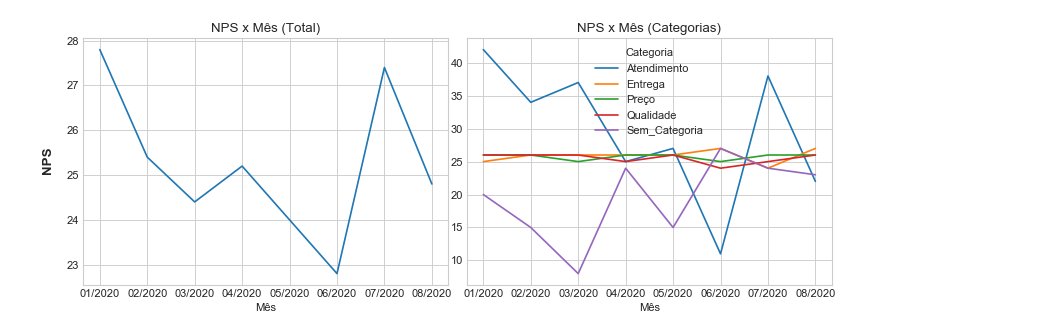

Text(0.04, 0.5, 'NPS')

In [675]:
#agora vamos plotar para entendermos melhor nosso NPS
f, a = plt.subplots(nrows=1, ncols=2, figsize=(13, 4), dpi= 80)
nps_perc_total.plot(ax=a[0], title='NPS x Mês (Total)', grid=True)

plt.subplots_adjust(left=0.08, bottom=None, right=0.8, top=None, wspace=0.05, hspace=0.3)
nps_perc_class.pivot('Mês','Categoria','NPS').plot(ax=a[1], title='NPS x Mês (Categorias)', grid=True)
f.text(0.04, 0.5, 'NPS', va='center', rotation='vertical', size = 12, fontweight='bold')

### Considerações NPS x Mês (Categorias)

        Realmente, nossa empresa não anda com a satisfação de nossos clientes, vemos bons resultados em pesquisas que estão "Sem Categoria" no sentido de termos subido bastante, porém nas demais categorias estabilizamos e é notável que nosso NPS Total caiu em 3 p.p. de 01/20 a 08/20 mas ainda não conseguimos ver claramente o que está acontecendo, por que não darmos uma olhadinha na porcentagem de participação de cada Categoria?

In [501]:
#lembra do nosso count de IDs de cliente por categoria? Agora ele irá nos ajudar 
agg_nps.head()

,Mês,Categoria,ID Cliente
0,01/2020,Atendimento,72
1,01/2020,Entrega,7572
2,01/2020,Preço,32865
3,01/2020,Qualidade,7625
4,01/2020,Sem_Categoria,69


In [516]:
#vamos criar uma coluna que ira contar o total de respondentes por mês e depois iremos dividir esse número assim como
#fizemos para o NPS

agg_mes = df.groupby(['Mês']).agg({'ID Cliente': 'count'}).reset_index()

nps_perc_mes = pd.merge(agg_nps, agg_mes, on = ['Mês'], how ='left') 

nps_perc_mes ['Representatividade'] = ((nps_perc_mes ['ID Cliente_x'] / nps_perc_mes ['ID Cliente_y'])*100).round(2)
nps_perc_mes.pivot(
    index = 'Categoria', columns = 'Mês', values = 'Representatividade').sort_values(by=['08/2020'], ascending=False)

Mês,01/2020,02/2020,03/2020,04/2020,05/2020,06/2020,07/2020,08/2020
Categoria,,,,,,,,
Preço,68.18,68.18,68.30,68.47,68.06,67.58,67.95,68.28
Qualidade,15.82,15.85,15.70,15.63,15.65,15.96,15.83,15.87
Entrega,15.71,15.72,15.73,15.61,16.02,16.20,15.93,15.58
Atendimento,0.15,0.12,0.15,0.15,0.14,0.15,0.13,0.17
Sem_Categoria,0.14,0.13,0.12,0.14,0.13,0.12,0.16,0.09


### Considerações Representatividade x Mês (Categorias)

        O que conseguimos enxergar agora é que nossos clientes sempre falam sobre Preço independente do mês e que Qualidade e Entrega estão sempre lado a lado, o que ainda não referênciamos é como essa representatividade se alinha ao nosso NPS, vamos agora plotar um gráfico de dispersão da Representatividade contra o NPS para entender se existe alguma relação.

In [517]:
nps_perc_rpnps = pd.merge(nps_perc_class, nps_perc_mes, on = ['Mês', 'Categoria'], how ='left') 
nps_perc_rpnps.head(6)

,Mês,Categoria,Detrator,Passivo,Promotor,NPS,ID Cliente_x,ID Cliente_y,Representatividade
0,01/2020,Atendimento,11.0,36.0,53.0,42.0,72,48203,0.15
1,01/2020,Entrega,13.0,50.0,38.0,25.0,7572,48203,15.71
2,01/2020,Preço,12.0,50.0,38.0,26.0,32865,48203,68.18
3,01/2020,Qualidade,12.0,49.0,38.0,26.0,7625,48203,15.82
4,01/2020,Sem_Categoria,12.0,57.0,32.0,20.0,69,48203,0.14
5,02/2020,Atendimento,8.0,49.0,42.0,34.0,59,47540,0.12


<IPython.core.display.Javascript object>


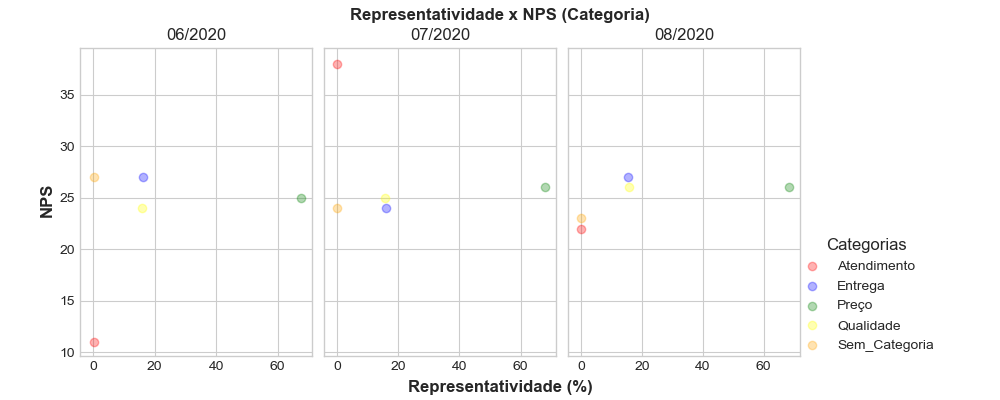

Text(0.5, 0.02, 'Representatividade (%)')

In [677]:
cats = list(dict.fromkeys(nps_perc_rpnps['Categoria']))
mes = list(dict.fromkeys(nps_perc_rpnps['Mês']))
color = ['red','blue','green','yellow','orange']

fig2,  (ax6,ax7, ax8) = plt.subplots(1, 3, sharey = True, figsize=(10,4))
axs = [ax1,ax2,ax3,ax4,ax5, ax6, ax7, ax8]
plt.subplots_adjust(left=0.08, bottom=None, right=0.8, top=None, wspace=0.05, hspace=0.3)


#plt.figure(figsize=(10,60))
for h in range(0, len(mes)):
    nome_mes = mes[h]
    nps_perc_mes2 = nps_perc_rpnps[nps_perc_rpnps['Mês'] == '{}'.format(nome_mes)]
    for n in range(0,len(cats)):
        # nps_perc_total.plot(ax=c[0], title='NPS x Mês (Total)', grid=True)
        nome_cat = cats[n]
        colors = color[n]
        df_scar = nps_perc_mes2[nps_perc_mes2['Categoria'] == '{}'.format(nome_cat)]
        axs[h].scatter(df_scar['Representatividade'],df_scar['NPS'],
                    c = '{}'.format(colors),alpha=0.3, label= '{}'.format(nome_cat))
        axs[h].set_title('{}'.format(nome_mes))

plt.legend(bbox_to_anchor=(1.6,0.4),
           borderaxespad=0, loc='upper right',
           title='Categorias', title_fontsize=12)
plt.suptitle('Representatividade x NPS (Categoria)', fontweight='bold')
fig2.text(0.04, 0.5, 'NPS', va='center', rotation='vertical', size = 12, fontweight='bold')
fig2.text(0.5, 0.02, 'Representatividade (%)', ha='center', rotation='horizontal',  size = 12, fontweight='bold')

In [648]:
cat2 = ['Atendimento','Entrega','Preço', 'Qualidade', 'Sem_Categoria']
erro_cat = nps_perc_class[['Categoria', 'NPS']]

for n in range(0,len(cats)):
    
    nome_cat = cat2[n]
    erro_cat2 = erro_cat[
        erro_cat['Categoria'] =='{}'.format(nome_cat)].drop(
        columns=['Categoria']).rename(
        columns={"NPS":'{}'.format(nome_cat)}).T
    
    erro_cat2['mean']=erro_cat2.mean(axis=1)
    erro_cat2['std']=erro_cat2.std(axis=1)
    erro_cat2['erropd']=erro_cat2['std']/sqrt(len(mes))
    erro_cat2['i_min']=erro_cat2['mean']-erro_cat2['erropd']
    erro_cat2['i_max']=erro_cat2['mean']+erro_cat2['erropd']
    erro_cat2['yerr']=erro_cat2['erropd']
    
    globals()['df_' + str( '{}'.format(nome_cat))] = erro_cat2[['mean', 'i_min', 'i_max', 'yerr', 'std']]

df_erro = pd.concat([
    df_Atendimento,
    df_Entrega,
    df_Preço, 
    df_Qualidade, 
    df_Sem_Categoria])

df_Atendimento

,mean,i_min,i_max,yerr,std
Classificação,,,,,
Atendimento,29.5,26.122686,32.877314,3.377314,9.552487


<IPython.core.display.Javascript object>


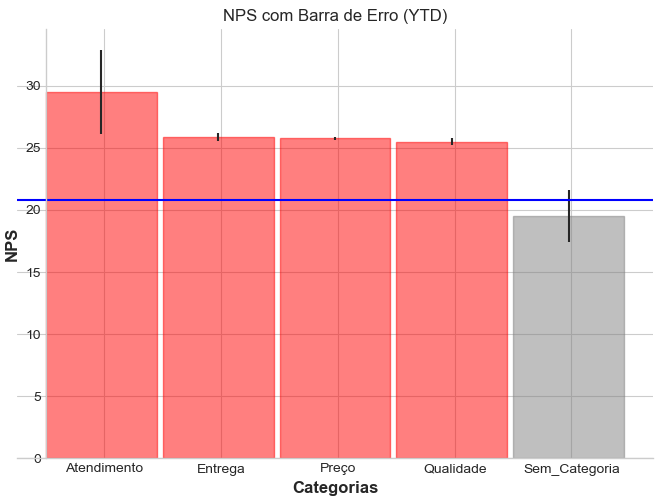

Text(70.41360856269112, 0.5, 'NPS')

In [664]:
%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

cl_max_color='red'
cl_min_color='blue'
cl_neitral_color='grey'

class Cursor(object):
    _df=None
    _bl=None
    def __init__(self, ax, data_F, bars):
        self._df=data_F
        self._bl=bars
        self.ax = ax
        self.lx = ax.axhline(color='b')

    def mouse_move(self, event):
        if not event.inaxes:
            return
        x, y = event.xdata, event.ydata
        self.lx.set_ydata(y)
        for index, row in self._df.iterrows():
            if row['i_max']<y:
                self._bl[self._df.index.get_loc(index)].set_color(cl_min_color)
                continue
            if row['i_min']>y:
                self._bl[self._df.index.get_loc(index)].set_color(cl_max_color)
                continue
            
            self._bl[self._df.index.get_loc(index)].set_color(cl_neitral_color)
        plt.draw()

        
def plot_base(fix_x, fig_y, fig_title, c_alpha=0.5):
    ax=df_erro['mean'].plot.bar(yerr=df_erro['yerr'], 
        title =fig_title, figsize=(fix_x, fig_y), 
        legend=False, fontsize=10, alpha=c_alpha, width=0.95, 
        rot=0, position=0, style='-', color=cl_neitral_color)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')

    majors = [0.5,1.5,2.5, 3.5, 4.5]
    ax.xaxis.set_major_locator(ticker.FixedLocator(majors))

    plt.tight_layout()
    
    return (ax, ax.get_children()[1:6])

ax, barlist=plot_base(6, 6, "NPS com Barra de Erro (YTD)")

cursor = Cursor(ax, df_erro, barlist)
plt.connect('motion_notify_event', cursor.mouse_move)
ax.set_xlabel('Categorias', fontweight='bold', size = 12)
ax.set_ylabel('NPS', fontweight='bold', size = 12)